In [15]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: FORD
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1226 
Tsesting data: 756 


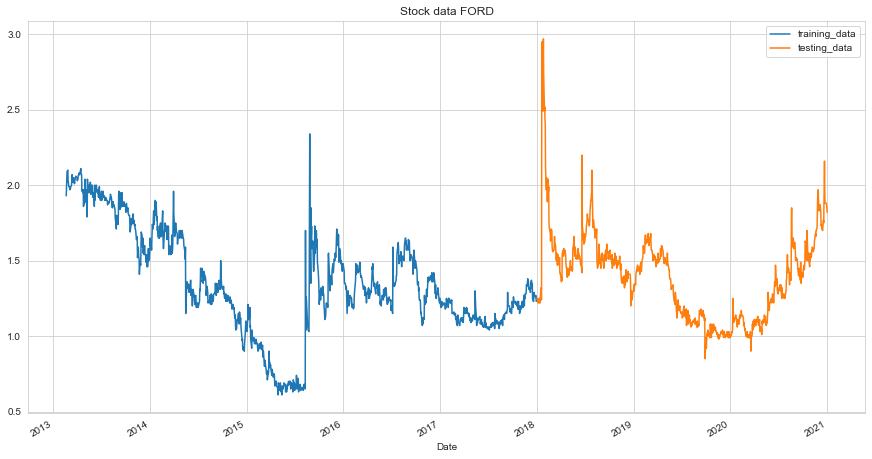

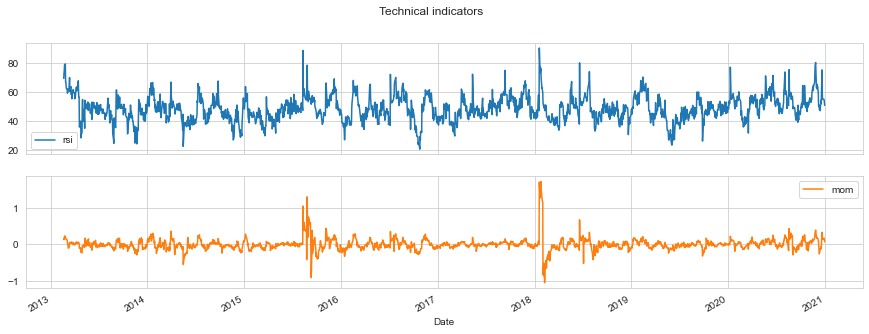

In [16]:
stock_name = 'ford'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1778.84, duration: 0:00:00.218062
episode: 2/2000, episode end value: 1786.57, duration: 0:00:00.230037
episode: 3/2000, episode end value: 1930.24, duration: 0:00:00.256058
episode: 4/2000, episode end value: 1824.72, duration: 0:00:00.242059
episode: 5/2000, episode end value: 1507.50, duration: 0:00:00.233049
episode: 6/2000, episode end value: 1619.80, duration: 0:00:00.243054
episode: 7/2000, episode end value: 1792.70, duration: 0:00:00.230051
episode: 8/2000, episode end value: 1792.49, duration: 0:00:00.232052
episode: 9/2000, episode end value: 1803.30, duration: 0:00:00.225065
episode: 10/2000, episode end value: 1633.30, duration: 0:00:00.222034
episode: 11/2000, episode end value: 1798.43, duration: 0:00:00.237056
episode: 12/2000, episode end value: 1783.43, duration: 0:00:00.252057
episode: 13/2000, episode end value: 1460.71, duration: 0:00:00.227052
episode: 14/2000, episode end value: 1564.50, duration: 0:00:00.214046
episode: 15/200

episode: 117/2000, episode end value: 1500.74, duration: 0:00:00.240063
episode: 118/2000, episode end value: 1482.90, duration: 0:00:00.229033
episode: 119/2000, episode end value: 1495.37, duration: 0:00:00.248057
episode: 120/2000, episode end value: 1511.12, duration: 0:00:00.290064
episode: 121/2000, episode end value: 1498.15, duration: 0:00:00.265061
episode: 122/2000, episode end value: 1399.70, duration: 0:00:00.257059
episode: 123/2000, episode end value: 1458.65, duration: 0:00:00.252057
episode: 124/2000, episode end value: 1575.57, duration: 0:00:00.269056
episode: 125/2000, episode end value: 1636.43, duration: 0:00:00.264059
episode: 126/2000, episode end value: 1554.65, duration: 0:00:00.254059
episode: 127/2000, episode end value: 1487.48, duration: 0:00:00.306068
episode: 128/2000, episode end value: 1460.54, duration: 0:00:00.280060
episode: 129/2000, episode end value: 1575.48, duration: 0:00:00.290067
episode: 130/2000, episode end value: 1487.37, duration: 0:00:00

episode: 231/2000, episode end value: 1509.51, duration: 0:00:00.323073
episode: 232/2000, episode end value: 1512.02, duration: 0:00:00.296071
episode: 233/2000, episode end value: 1672.52, duration: 0:00:00.316072
episode: 234/2000, episode end value: 1640.53, duration: 0:00:00.286063
episode: 235/2000, episode end value: 1464.00, duration: 0:00:00.280066
episode: 236/2000, episode end value: 1492.29, duration: 0:00:00.290060
episode: 237/2000, episode end value: 1429.21, duration: 0:00:00.302068
episode: 238/2000, episode end value: 1514.20, duration: 0:00:00.291068
episode: 239/2000, episode end value: 1436.85, duration: 0:00:00.309063
episode: 240/2000, episode end value: 1639.94, duration: 0:00:00.304068
episode: 241/2000, episode end value: 1494.96, duration: 0:00:00.329073
episode: 242/2000, episode end value: 1483.40, duration: 0:00:00.324070
episode: 243/2000, episode end value: 1477.84, duration: 0:00:00.292066
episode: 244/2000, episode end value: 1444.60, duration: 0:00:00

episode: 345/2000, episode end value: 1628.71, duration: 0:00:00.393091
episode: 346/2000, episode end value: 1460.20, duration: 0:00:00.433093
episode: 347/2000, episode end value: 1496.16, duration: 0:00:00.417095
episode: 348/2000, episode end value: 1608.23, duration: 0:00:00.469107
episode: 349/2000, episode end value: 1515.35, duration: 0:00:00.468106
episode: 350/2000, episode end value: 1639.82, duration: 0:00:00.481103
episode: 351/2000, episode end value: 1532.25, duration: 0:00:00.409087
episode: 352/2000, episode end value: 1508.60, duration: 0:00:00.455105
episode: 353/2000, episode end value: 1520.54, duration: 0:00:00.454101
episode: 354/2000, episode end value: 1440.60, duration: 0:00:00.448104
episode: 355/2000, episode end value: 1485.78, duration: 0:00:00.428092
episode: 356/2000, episode end value: 1498.06, duration: 0:00:00.445099
episode: 357/2000, episode end value: 1638.07, duration: 0:00:00.459103
episode: 358/2000, episode end value: 1634.30, duration: 0:00:00

episode: 459/2000, episode end value: 1500.79, duration: 0:00:00.388086
episode: 460/2000, episode end value: 1482.91, duration: 0:00:00.449102
episode: 461/2000, episode end value: 1673.41, duration: 0:00:00.402091
episode: 462/2000, episode end value: 1422.83, duration: 0:00:00.380087
episode: 463/2000, episode end value: 1473.19, duration: 0:00:00.415094
episode: 464/2000, episode end value: 1459.88, duration: 0:00:00.402090
episode: 465/2000, episode end value: 1558.72, duration: 0:00:00.484105
episode: 466/2000, episode end value: 1441.42, duration: 0:00:00.375087
episode: 467/2000, episode end value: 1435.43, duration: 0:00:00.472104
episode: 468/2000, episode end value: 1509.56, duration: 0:00:00.365083
episode: 469/2000, episode end value: 1509.52, duration: 0:00:00.417099
episode: 470/2000, episode end value: 1423.45, duration: 0:00:00.402092
episode: 471/2000, episode end value: 1494.20, duration: 0:00:00.419087
episode: 472/2000, episode end value: 1495.31, duration: 0:00:00

episode: 573/2000, episode end value: 1391.29, duration: 0:00:00.408090
episode: 574/2000, episode end value: 1653.05, duration: 0:00:00.417093
episode: 575/2000, episode end value: 1569.34, duration: 0:00:00.388086
episode: 576/2000, episode end value: 1480.19, duration: 0:00:00.376085
episode: 577/2000, episode end value: 1506.63, duration: 0:00:00.387087
episode: 578/2000, episode end value: 1459.54, duration: 0:00:00.365085
episode: 579/2000, episode end value: 1662.82, duration: 0:00:00.449102
episode: 580/2000, episode end value: 1427.81, duration: 0:00:00.458099
episode: 581/2000, episode end value: 1440.16, duration: 0:00:00.417092
episode: 582/2000, episode end value: 1465.79, duration: 0:00:00.421094
episode: 583/2000, episode end value: 1488.35, duration: 0:00:00.387087
episode: 584/2000, episode end value: 1553.03, duration: 0:00:00.394091
episode: 585/2000, episode end value: 1465.44, duration: 0:00:00.447099
episode: 586/2000, episode end value: 1453.07, duration: 0:00:00

episode: 687/2000, episode end value: 1461.64, duration: 0:00:00.401091
episode: 688/2000, episode end value: 1658.72, duration: 0:00:00.460100
episode: 689/2000, episode end value: 1449.60, duration: 0:00:00.398083
episode: 690/2000, episode end value: 1500.96, duration: 0:00:00.403089
episode: 691/2000, episode end value: 1641.52, duration: 0:00:00.472108
episode: 692/2000, episode end value: 1450.21, duration: 0:00:00.442101
episode: 693/2000, episode end value: 1517.73, duration: 0:00:00.358086
episode: 694/2000, episode end value: 1506.29, duration: 0:00:00.397084
episode: 695/2000, episode end value: 1634.35, duration: 0:00:00.435096
episode: 696/2000, episode end value: 1518.29, duration: 0:00:00.387088
episode: 697/2000, episode end value: 1546.03, duration: 0:00:00.429097
episode: 698/2000, episode end value: 1482.63, duration: 0:00:00.386088
episode: 699/2000, episode end value: 1519.95, duration: 0:00:00.426098
episode: 700/2000, episode end value: 1403.38, duration: 0:00:00

episode: 801/2000, episode end value: 1811.31, duration: 0:00:00.420091
episode: 802/2000, episode end value: 1546.72, duration: 0:00:00.420095
episode: 803/2000, episode end value: 1453.18, duration: 0:00:00.414092
episode: 804/2000, episode end value: 1519.40, duration: 0:00:00.415092
episode: 805/2000, episode end value: 1584.39, duration: 0:00:00.379085
episode: 806/2000, episode end value: 1829.83, duration: 0:00:00.384088
episode: 807/2000, episode end value: 1675.53, duration: 0:00:00.423094
episode: 808/2000, episode end value: 1494.50, duration: 0:00:00.415091
episode: 809/2000, episode end value: 1463.29, duration: 0:00:00.368085
episode: 810/2000, episode end value: 1524.39, duration: 0:00:00.408091
episode: 811/2000, episode end value: 1530.90, duration: 0:00:00.459103
episode: 812/2000, episode end value: 1476.24, duration: 0:00:00.460102
episode: 813/2000, episode end value: 1492.14, duration: 0:00:00.498111
episode: 814/2000, episode end value: 1504.07, duration: 0:00:00

episode: 915/2000, episode end value: 1522.43, duration: 0:00:00.361080
episode: 916/2000, episode end value: 1510.90, duration: 0:00:00.385086
episode: 917/2000, episode end value: 1587.26, duration: 0:00:00.422094
episode: 918/2000, episode end value: 1650.24, duration: 0:00:00.438098
episode: 919/2000, episode end value: 1642.66, duration: 0:00:00.448103
episode: 920/2000, episode end value: 1469.67, duration: 0:00:00.378081
episode: 921/2000, episode end value: 1607.39, duration: 0:00:00.429097
episode: 922/2000, episode end value: 1515.28, duration: 0:00:00.385085
episode: 923/2000, episode end value: 1621.76, duration: 0:00:00.427098
episode: 924/2000, episode end value: 1570.55, duration: 0:00:00.400090
episode: 925/2000, episode end value: 1507.46, duration: 0:00:00.373084
episode: 926/2000, episode end value: 1479.89, duration: 0:00:00.390087
episode: 927/2000, episode end value: 1669.78, duration: 0:00:00.381088
episode: 928/2000, episode end value: 1466.96, duration: 0:00:00

episode: 1029/2000, episode end value: 1431.59, duration: 0:00:00.419094
episode: 1030/2000, episode end value: 1633.69, duration: 0:00:00.443099
episode: 1031/2000, episode end value: 1398.02, duration: 0:00:00.386084
episode: 1032/2000, episode end value: 1530.09, duration: 0:00:00.393090
episode: 1033/2000, episode end value: 1418.71, duration: 0:00:00.412091
episode: 1034/2000, episode end value: 1668.03, duration: 0:00:00.409088
episode: 1035/2000, episode end value: 1619.52, duration: 0:00:00.387089
episode: 1036/2000, episode end value: 1500.46, duration: 0:00:00.467104
episode: 1037/2000, episode end value: 1572.66, duration: 0:00:00.360080
episode: 1038/2000, episode end value: 1438.64, duration: 0:00:00.392087
episode: 1039/2000, episode end value: 1428.57, duration: 0:00:00.361082
episode: 1040/2000, episode end value: 1573.65, duration: 0:00:00.426096
episode: 1041/2000, episode end value: 1452.91, duration: 0:00:00.401091
episode: 1042/2000, episode end value: 1439.96, dur

episode: 1142/2000, episode end value: 1438.74, duration: 0:00:00.417091
episode: 1143/2000, episode end value: 1538.52, duration: 0:00:00.427096
episode: 1144/2000, episode end value: 1489.26, duration: 0:00:00.381084
episode: 1145/2000, episode end value: 1482.43, duration: 0:00:00.403090
episode: 1146/2000, episode end value: 1466.10, duration: 0:00:00.445101
episode: 1147/2000, episode end value: 1682.48, duration: 0:00:00.427095
episode: 1148/2000, episode end value: 1489.52, duration: 0:00:00.393086
episode: 1149/2000, episode end value: 1432.47, duration: 0:00:00.432094
episode: 1150/2000, episode end value: 1464.16, duration: 0:00:00.416093
episode: 1151/2000, episode end value: 1412.01, duration: 0:00:00.408095
episode: 1152/2000, episode end value: 1520.27, duration: 0:00:00.396087
episode: 1153/2000, episode end value: 1508.87, duration: 0:00:00.428099
episode: 1154/2000, episode end value: 1479.86, duration: 0:00:00.422096
episode: 1155/2000, episode end value: 1482.79, dur

episode: 1255/2000, episode end value: 1475.28, duration: 0:00:00.399090
episode: 1256/2000, episode end value: 1449.51, duration: 0:00:00.376081
episode: 1257/2000, episode end value: 1459.78, duration: 0:00:00.388087
episode: 1258/2000, episode end value: 1565.86, duration: 0:00:00.433104
episode: 1259/2000, episode end value: 1532.00, duration: 0:00:00.395091
episode: 1260/2000, episode end value: 1486.13, duration: 0:00:00.402089
episode: 1261/2000, episode end value: 1489.69, duration: 0:00:00.406091
episode: 1262/2000, episode end value: 1495.99, duration: 0:00:00.376086
episode: 1263/2000, episode end value: 1664.71, duration: 0:00:00.413092
episode: 1264/2000, episode end value: 1470.17, duration: 0:00:00.380085
episode: 1265/2000, episode end value: 1417.99, duration: 0:00:00.358080
episode: 1266/2000, episode end value: 1573.51, duration: 0:00:00.452102
episode: 1267/2000, episode end value: 1433.09, duration: 0:00:00.437105
episode: 1268/2000, episode end value: 1585.81, dur

episode: 1368/2000, episode end value: 1430.27, duration: 0:00:00.386086
episode: 1369/2000, episode end value: 1449.31, duration: 0:00:00.383086
episode: 1370/2000, episode end value: 1653.68, duration: 0:00:00.450097
episode: 1371/2000, episode end value: 1397.85, duration: 0:00:00.394087
episode: 1372/2000, episode end value: 1546.90, duration: 0:00:00.408092
episode: 1373/2000, episode end value: 1693.66, duration: 0:00:00.471104
episode: 1374/2000, episode end value: 1515.55, duration: 0:00:00.424093
episode: 1375/2000, episode end value: 1419.02, duration: 0:00:00.372083
episode: 1376/2000, episode end value: 1669.39, duration: 0:00:00.471105
episode: 1377/2000, episode end value: 1474.19, duration: 0:00:00.413098
episode: 1378/2000, episode end value: 1564.56, duration: 0:00:00.380084
episode: 1379/2000, episode end value: 1517.28, duration: 0:00:00.414092
episode: 1380/2000, episode end value: 1488.98, duration: 0:00:00.388084
episode: 1381/2000, episode end value: 1542.38, dur

episode: 1481/2000, episode end value: 1549.65, duration: 0:00:00.388088
episode: 1482/2000, episode end value: 1538.90, duration: 0:00:00.428093
episode: 1483/2000, episode end value: 1499.75, duration: 0:00:00.423094
episode: 1484/2000, episode end value: 1449.59, duration: 0:00:00.417094
episode: 1485/2000, episode end value: 1423.81, duration: 0:00:00.441100
episode: 1486/2000, episode end value: 1633.00, duration: 0:00:00.416092
episode: 1487/2000, episode end value: 1421.06, duration: 0:00:00.452101
episode: 1488/2000, episode end value: 1501.29, duration: 0:00:00.397089
episode: 1489/2000, episode end value: 1430.48, duration: 0:00:00.324071
episode: 1490/2000, episode end value: 1533.01, duration: 0:00:00.374091
episode: 1491/2000, episode end value: 1538.46, duration: 0:00:00.398087
episode: 1492/2000, episode end value: 1513.43, duration: 0:00:00.398089
episode: 1493/2000, episode end value: 1507.24, duration: 0:00:00.392086
episode: 1494/2000, episode end value: 1491.87, dur

episode: 1594/2000, episode end value: 1472.74, duration: 0:00:00.407087
episode: 1595/2000, episode end value: 1516.05, duration: 0:00:00.429098
episode: 1596/2000, episode end value: 1429.69, duration: 0:00:00.369084
episode: 1597/2000, episode end value: 1557.42, duration: 0:00:00.438098
episode: 1598/2000, episode end value: 1497.01, duration: 0:00:00.468103
episode: 1599/2000, episode end value: 1438.15, duration: 0:00:00.404092
episode: 1600/2000, episode end value: 1421.83, duration: 0:00:00.423096
episode: 1601/2000, episode end value: 1483.19, duration: 0:00:00.428096
episode: 1602/2000, episode end value: 1426.10, duration: 0:00:00.397092
episode: 1603/2000, episode end value: 1615.14, duration: 0:00:00.393086
episode: 1604/2000, episode end value: 1421.97, duration: 0:00:00.414092
episode: 1605/2000, episode end value: 1455.83, duration: 0:00:00.403092
episode: 1606/2000, episode end value: 1453.50, duration: 0:00:00.457105
episode: 1607/2000, episode end value: 1614.06, dur

episode: 1707/2000, episode end value: 1450.32, duration: 0:00:00.330073
episode: 1708/2000, episode end value: 1639.09, duration: 0:00:00.380084
episode: 1709/2000, episode end value: 1473.04, duration: 0:00:00.372084
episode: 1710/2000, episode end value: 1506.79, duration: 0:00:00.374089
episode: 1711/2000, episode end value: 1498.82, duration: 0:00:00.422094
episode: 1712/2000, episode end value: 1565.76, duration: 0:00:00.328075
episode: 1713/2000, episode end value: 1585.50, duration: 0:00:00.334075
episode: 1714/2000, episode end value: 1431.48, duration: 0:00:00.328075
episode: 1715/2000, episode end value: 1479.30, duration: 0:00:00.378087
episode: 1716/2000, episode end value: 1471.89, duration: 0:00:00.404089
episode: 1717/2000, episode end value: 1514.27, duration: 0:00:00.348082
episode: 1718/2000, episode end value: 1576.61, duration: 0:00:00.370084
episode: 1719/2000, episode end value: 1480.96, duration: 0:00:00.396093
episode: 1720/2000, episode end value: 1522.65, dur

episode: 1820/2000, episode end value: 1411.77, duration: 0:00:00.467104
episode: 1821/2000, episode end value: 1620.21, duration: 0:00:00.496113
episode: 1822/2000, episode end value: 1482.17, duration: 0:00:00.415092
episode: 1823/2000, episode end value: 1675.94, duration: 0:00:00.396087
episode: 1824/2000, episode end value: 1629.88, duration: 0:00:00.369080
episode: 1825/2000, episode end value: 1612.76, duration: 0:00:00.412093
episode: 1826/2000, episode end value: 1514.22, duration: 0:00:00.382082
episode: 1827/2000, episode end value: 1491.65, duration: 0:00:00.405092
episode: 1828/2000, episode end value: 1521.53, duration: 0:00:00.316070
episode: 1829/2000, episode end value: 1650.77, duration: 0:00:00.441103
episode: 1830/2000, episode end value: 1471.50, duration: 0:00:00.398087
episode: 1831/2000, episode end value: 1441.63, duration: 0:00:00.374085
episode: 1832/2000, episode end value: 1497.72, duration: 0:00:00.407092
episode: 1833/2000, episode end value: 1664.75, dur

episode: 1933/2000, episode end value: 1482.15, duration: 0:00:00.388090
episode: 1934/2000, episode end value: 1452.90, duration: 0:00:00.383088
episode: 1935/2000, episode end value: 1651.17, duration: 0:00:00.351075
episode: 1936/2000, episode end value: 1678.55, duration: 0:00:00.363085
episode: 1937/2000, episode end value: 1481.21, duration: 0:00:00.412095
episode: 1938/2000, episode end value: 1495.84, duration: 0:00:00.365078
episode: 1939/2000, episode end value: 1570.50, duration: 0:00:00.377088
episode: 1940/2000, episode end value: 1459.40, duration: 0:00:00.336076
episode: 1941/2000, episode end value: 1652.59, duration: 0:00:00.369090
episode: 1942/2000, episode end value: 1654.84, duration: 0:00:00.362081
episode: 1943/2000, episode end value: 1640.34, duration: 0:00:00.355078
episode: 1944/2000, episode end value: 1462.63, duration: 0:00:00.325073
episode: 1945/2000, episode end value: 1423.96, duration: 0:00:00.402087
episode: 1946/2000, episode end value: 1445.69, dur

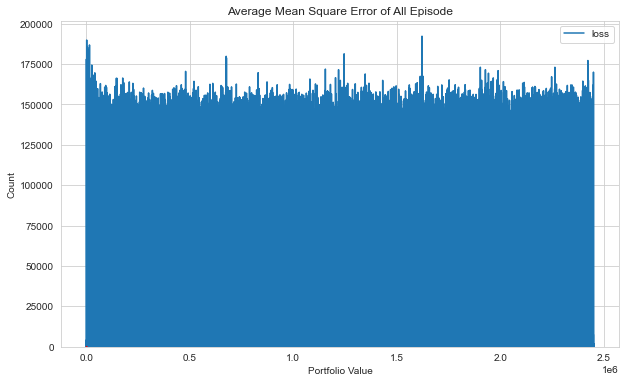

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

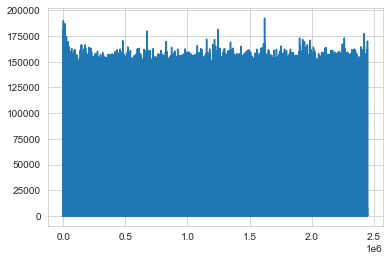

In [5]:
plt.plot(agent.model.losses)

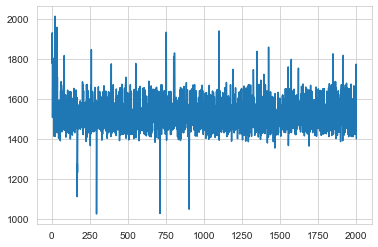

In [6]:
plt.plot(portfolio_value)

episode end value: 1362.16, duration: 0:00:00.063004
Sell: 74 times, Buy: 74 times


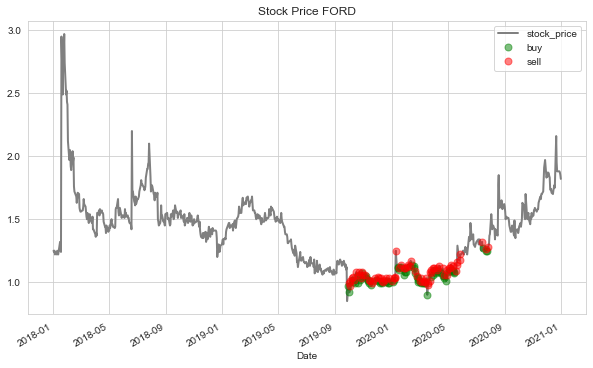

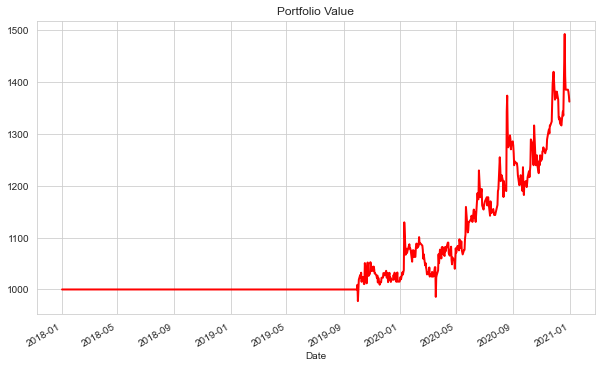

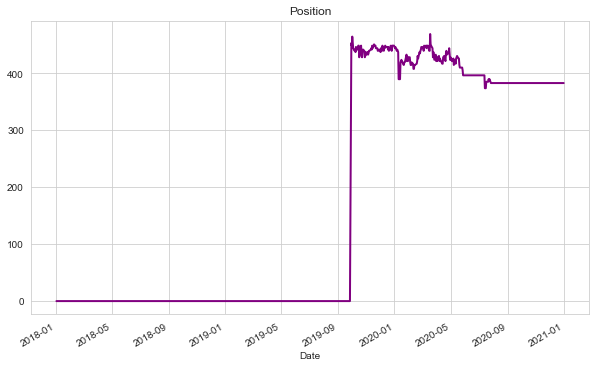

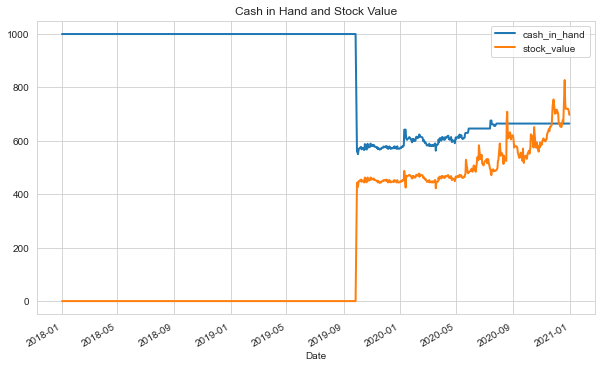

In [17]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [18]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: FORD
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 10.85 %
Volatility: 0.1957
shape ratio: 0.4982
Maximun drawdown: -13.95 %
Calmar ratio: 0.7780
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 13.34 %
Volatility (benchmark): 1.0603
shape ratio: 0.1154
Maximun drawdown: -71.38 %
Calmar ratio (benchmark): 0.1869


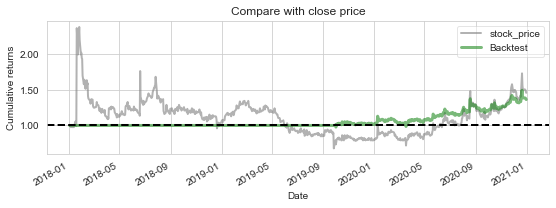

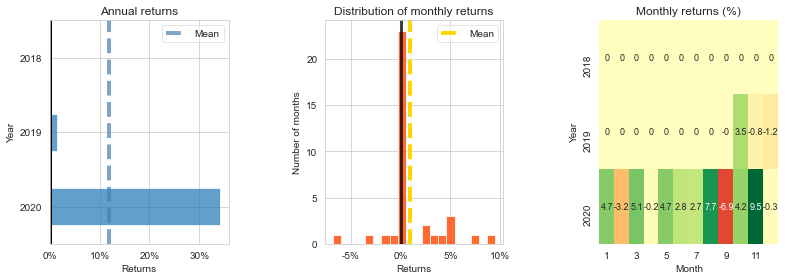

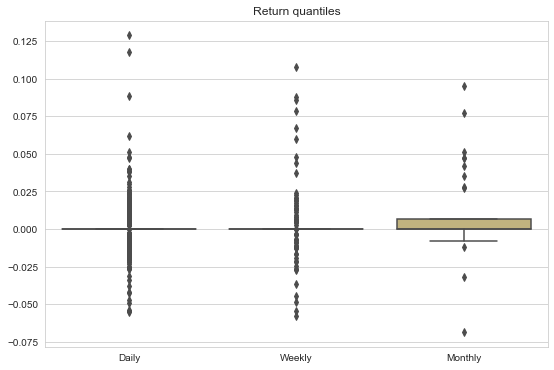

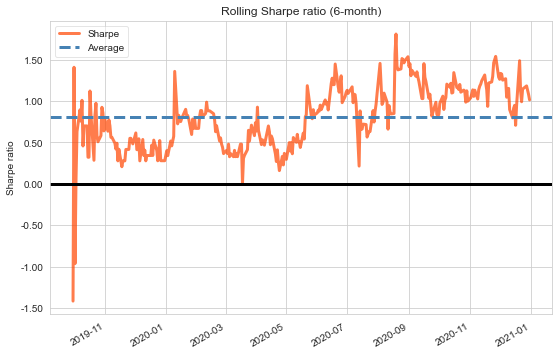

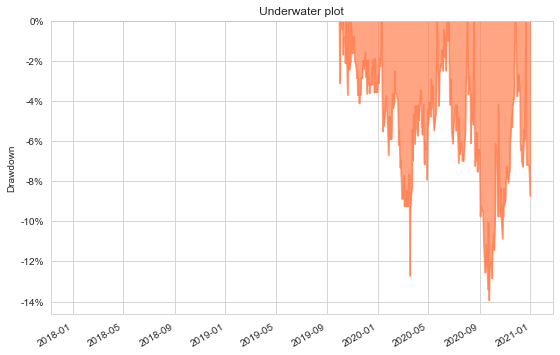

In [19]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')